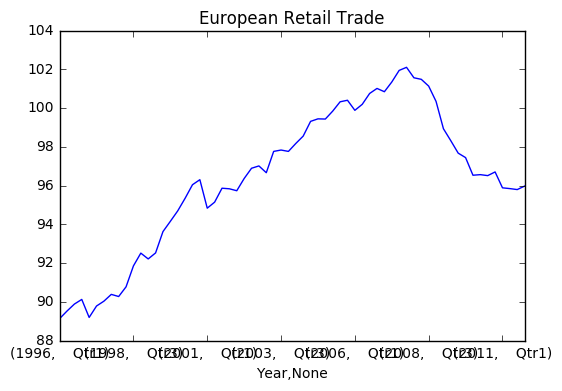

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('../../assets/data/euretail.csv')
df = df.set_index(['Year'])
df.stack().plot(title='European Retail Trade')

In [14]:
df.stack()

Year         
1996     Qtr1     89.13
         Qtr2     89.52
         Qtr3     89.88
         Qtr4     90.12
1997     Qtr1     89.19
         Qtr2     89.78
         Qtr3     90.03
         Qtr4     90.38
1998     Qtr1     90.27
         Qtr2     90.77
         Qtr3     91.85
         Qtr4     92.51
1999     Qtr1     92.21
         Qtr2     92.52
         Qtr3     93.62
         Qtr4     94.15
2000     Qtr1     94.69
         Qtr2     95.34
         Qtr3     96.04
         Qtr4     96.30
2001     Qtr1     94.83
         Qtr2     95.14
         Qtr3     95.86
         Qtr4     95.83
2002     Qtr1     95.73
         Qtr2     96.36
         Qtr3     96.89
         Qtr4     97.01
2003     Qtr1     96.66
         Qtr2     97.76
                  ...  
2004     Qtr3     99.31
         Qtr4     99.44
2005     Qtr1     99.43
         Qtr2     99.84
         Qtr3    100.32
         Qtr4    100.40
2006     Qtr1     99.88
         Qtr2    100.19
         Qtr3    100.75
         Qtr4    101.01
20

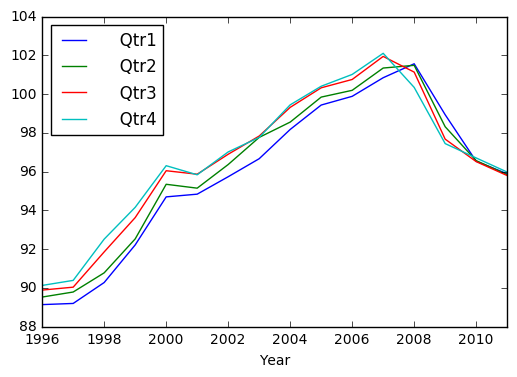

In [15]:
df.plot()

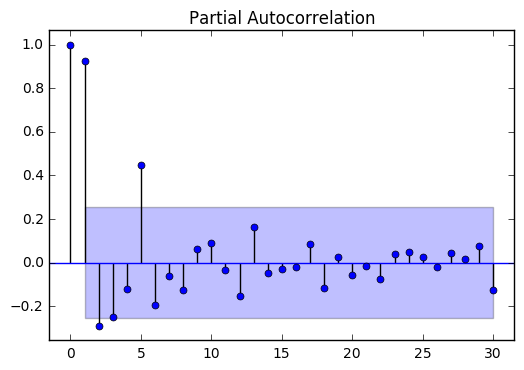

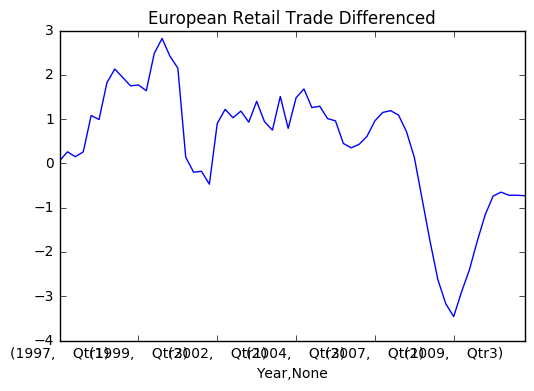

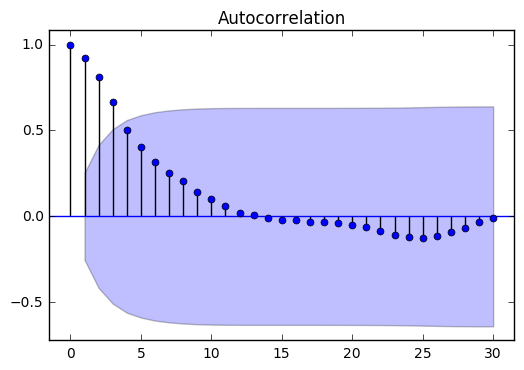

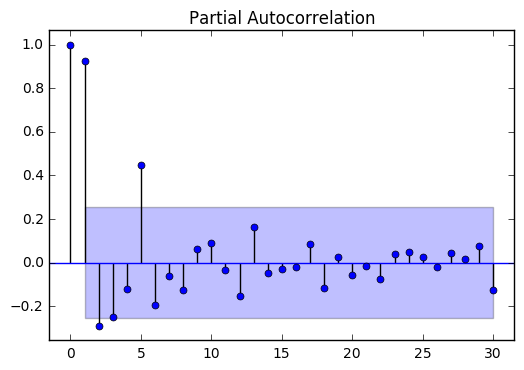

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff0 = df.stack().diff(periods=4)[4:] # for seasonal
diff0.plot(title='European Retail Trade Differenced')
plot_acf(diff0, lags=30)
plot_pacf(diff0, lags=30)

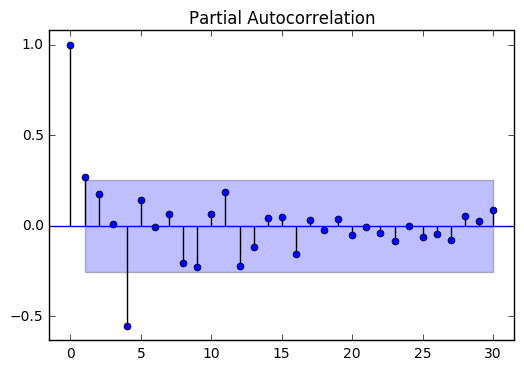

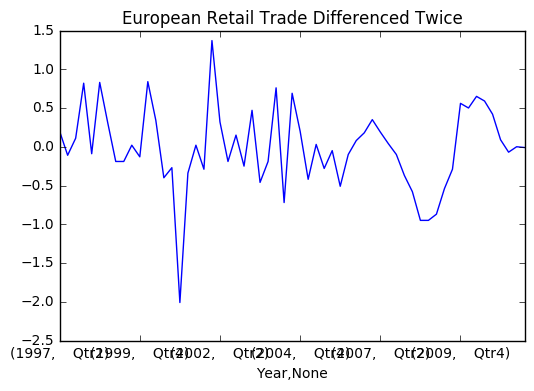

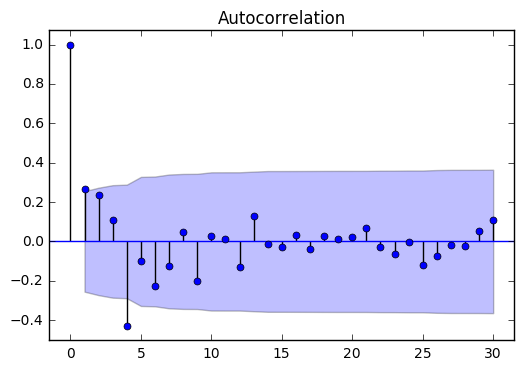

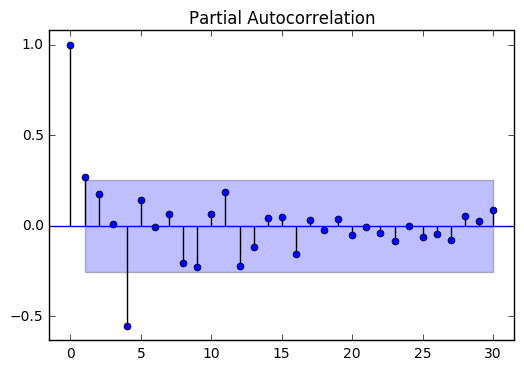

In [23]:
diff1 = diff0.diff()[1:] #seasonal and non seasonal
diff1.plot(title='European Retail Trade Differenced Twice')
plot_acf(diff1, lags=30)
plot_pacf(diff1, lags=30)

In [54]:
import statsmodels.api as sm
data = df.stack().values
model = sm.tsa.statespace.SARIMAX(data, order=(2,1,1), seasonal_order=(0,1,1,4))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   64
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 -29.933
Date:                           Thu, 22 Dec 2016   AIC                             69.866
Time:                                   16:10:20   BIC                             80.660
Sample:                                        0   HQIC                            74.118
                                            - 64                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6337      0.527      1.203      0.229      -0.399       1.666
ar.L2          0.1684      0.290      0.581      0.561      -0.400       0.737
ma.L1         -0.3205      0.453     -0.708      0.479      -1.208       0.567
ma.S.L4       -0.9018      0.333     -2.711      0.007      -1.554      -0.250
sigma2         0.1460      0.039      3.700      0.000       0.069       0.223
===================================================================================
Ljung-Box (Q):                       23.43   Jarque-Bera (JB):                 1.76
Prob(Q):                              0.98   Prob(JB):                         0.42
Heteroskedasticity (H):               0.56   Skew:                             0.11
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

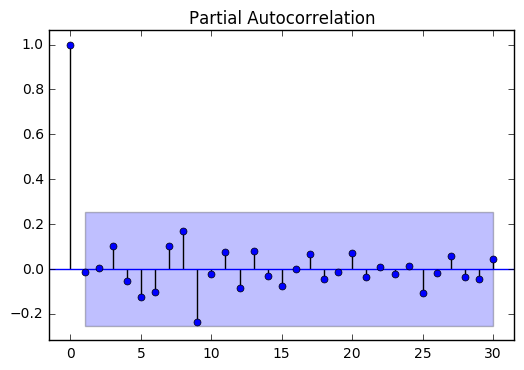

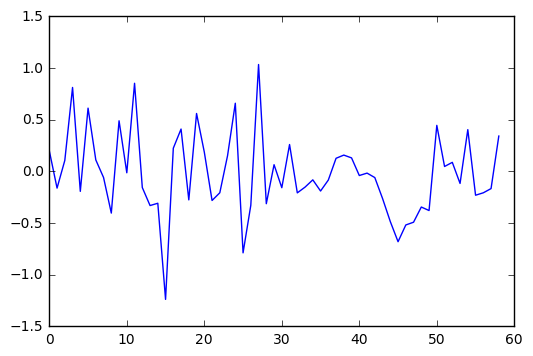

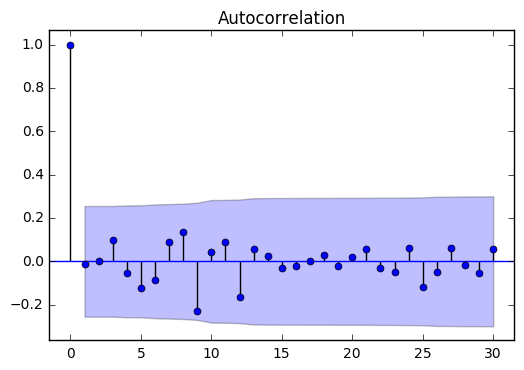

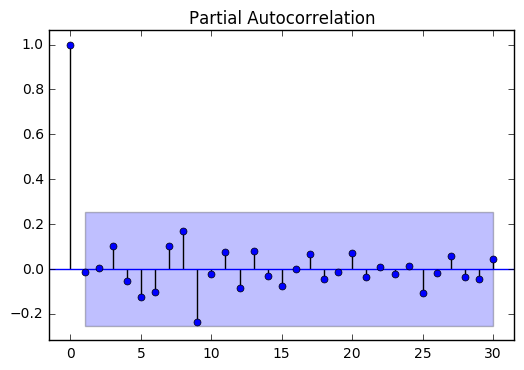

In [59]:
# Don't plot the first 5 values, to account for data loss when differencing (d=1 + D=5)
residuals = results.resid[5:]
plt.plot(residuals)
plot_acf(residuals, lags=30)
plot_pacf(residuals, lags=30)

In [56]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lags = min(10, len(residuals)/5)

acorr_ljungbox(residuals, lags=lags)


(array([ 0.01057825,  0.01128229,  0.6591871 ,  0.84493986,  1.83956072,
         2.33836743,  2.87432422,  4.13155523,  7.9486955 ,  8.09801295]),
 array([ 0.91808152,  0.99437473,  0.88275892,  0.93232372,  0.8708695 ,
         0.88610027,  0.89637971,  0.84506321,  0.53932466,  0.61926365]))

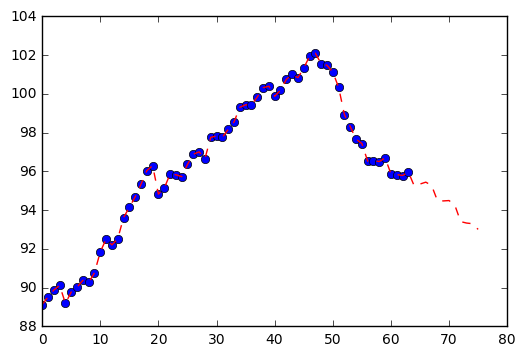

In [58]:
model = sm.tsa.statespace.SARIMAX(data, order=(2,1,1), seasonal_order=(0,1,1,4), trend='c')
res = model.fit()

preds = res.forecast(12)
fcast = np.concatenate((data, preds), axis=0)

plt.figure();
plt.plot(data, 'o' , fcast, 'r--');

In [49]:
model = sm.tsa.statespace.SARIMAX(data, order=(2,1,2), seasonal_order=(1,1,0,4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   64
Model:             SARIMAX(2, 1, 2)x(1, 1, 0, 4)   Log Likelihood                 -31.966
Date:                           Thu, 22 Dec 2016   AIC                             75.932
Time:                                   15:59:28   BIC                             88.885
Sample:                                        0   HQIC                            81.035
                                            - 64                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5485      0.332      1.655      0.098      -0.101       1.198
ar.L2         -0.2809      0.301     -0.935      0.350      -0.870       0.308
ma.L1         -0.3347      0.262     -1.276      0.202      -0.849       0.179
ma.L2          0.6647      0.233      2.848      0.004       0.207       1.122
ar.S.L4       -0.4020      0.147     -2.726      0.006      -0.691      -0.113
sigma2         0.1672      0.030      5.572      0.000       0.108       0.226
===================================================================================
Ljung-Box (Q):                       34.76   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.70   Prob(JB):                         0.42
Heteroskedasticity (H):               0.48   Skew:                            -0.36
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Figure(432x288)
Figure(432x288)


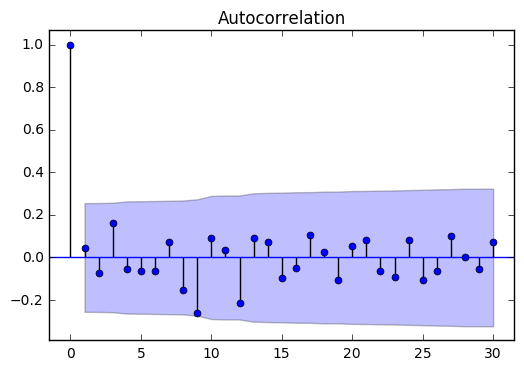

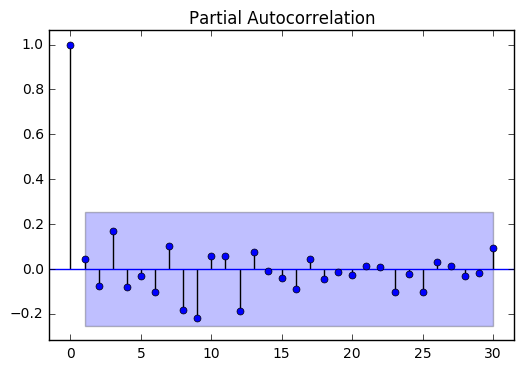

In [50]:
residuals = results.resid[5:]

print plot_acf(residuals, lags=30)
print plot_pacf(residuals, lags=30)

In [51]:
lags = min(10, len(residuals)/5)

acorr_ljungbox(residuals, lags=lags)

(array([  0.12553366,   0.45610551,   2.10397828,   2.29663579,
          2.56296624,   2.85604167,   3.22310897,   4.9182405 ,
          9.86668805,  10.45572971]),
 array([ 0.7231086 ,  0.79608226,  0.55110835,  0.68138163,  0.7669838 ,
         0.82668616,  0.86362437,  0.76627791,  0.36138508,  0.40146008]))

In [61]:
!pip install ipython-sql

  Running setup.py bdist_wheel for ipython-sql ... - \ done
  Stored in directory: /Users/user/Library/Caches/pip/wheels/98/e3/5f/78dcb15c0532616bb007d42a6086d9b499c3b4728b29596936
  Running setup.py bdist_wheel for prettytable ... - \ done
  Stored in directory: /Users/user/Library/Caches/pip/wheels/b6/90/7b/1c22b89217d0eba6d5f406e562365ebee804f0d4595b2bdbcd
Successfully built ipython-sql prettytable
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
